In [1]:
import geopandas as gpd

http://geopandas.org/install.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline # sustituye plt.show()
plt.style.use('ggplot')

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [6]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


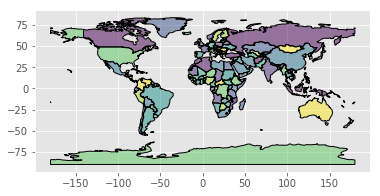

In [7]:
world.plot()

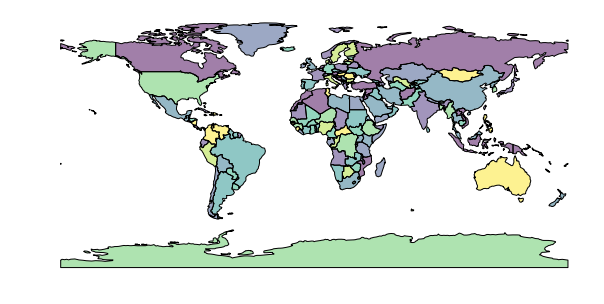

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.set_aspect('equal')
world.plot(ax=ax)

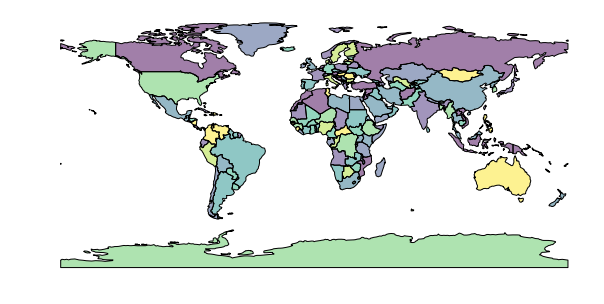

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world.plot(ax=ax)

In [14]:
world_sin_antartica = world[world.name != "Antarctica"]

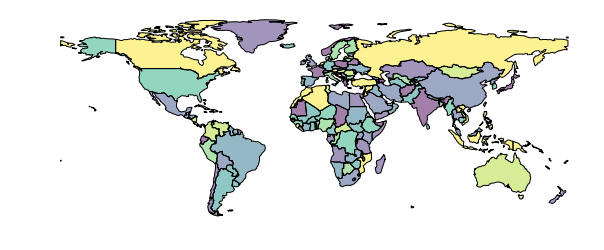

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world_sin_antartica.plot(ax=ax)

In [22]:
world_sin_eua = world_sin_antartica[world_sin_antartica.name != "United States"]

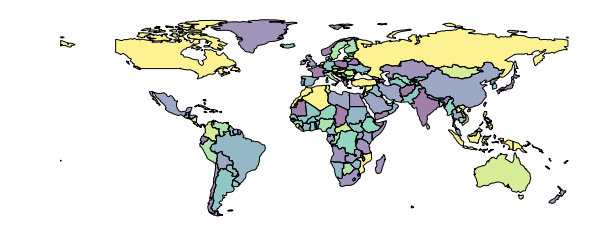

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world_sin_eua.plot(ax=ax)

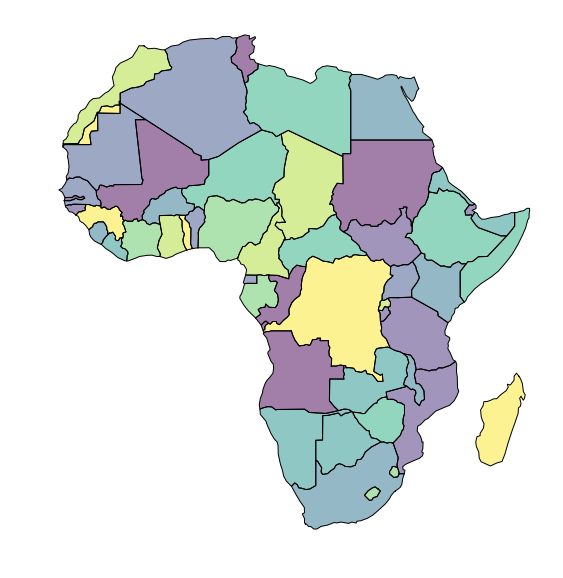

In [29]:
africa = world[world.continent == "Africa"]
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
africa.plot(ax=ax)

In [24]:
eua = world[world.name == "United States"]

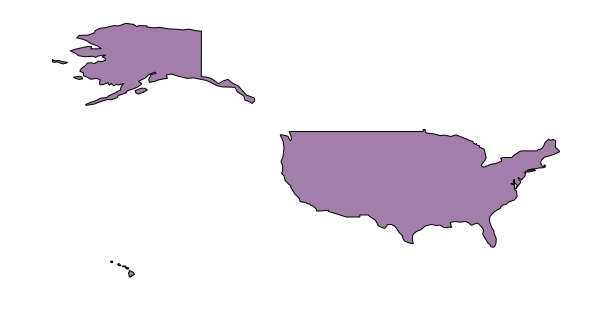

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
eua.plot(ax=ax)

In [27]:
paises_fuera_mundial = ['Chile', 'United States', 'Netherlands']
paises_malos_soccer = world[world['name'].isin(paises_fuera_mundial)]

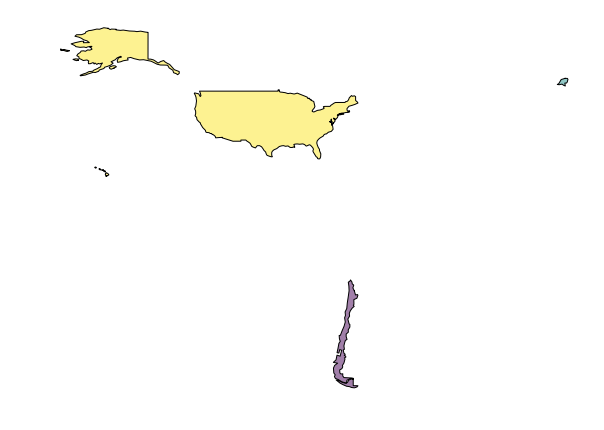

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
paises_malos_soccer.plot(ax=ax)

In [9]:
mex_index = 0
for row in range(len(world)):
    country = world['name'][row]
    if country == 'Germany':
        mex_index += row
print(mex_index)

41


In [10]:
list(world['name']).index('Germany')

41

In [11]:
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

In [12]:
world_feliz = world[(world.name != "Venezuela")]

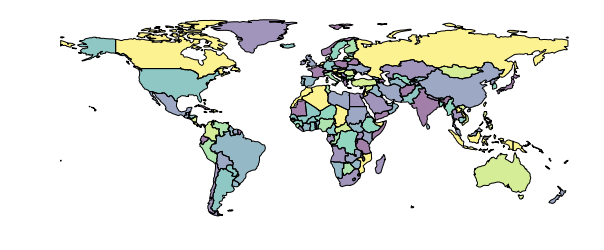

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world.plot(ax=ax)
plt.show()

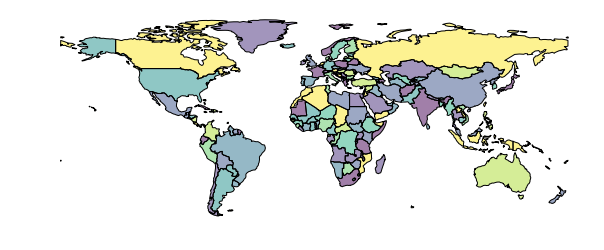

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world_feliz.plot(ax=ax)
plt.show()

In [16]:
china = world[(world.name == "China")]

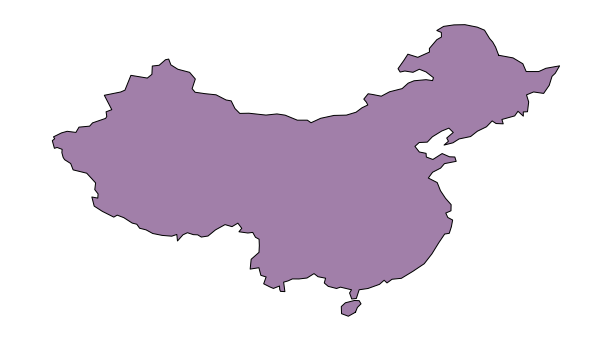

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
china.plot(ax=ax)
plt.show()

In [19]:
asia = world[(world.continent == "Asia")]

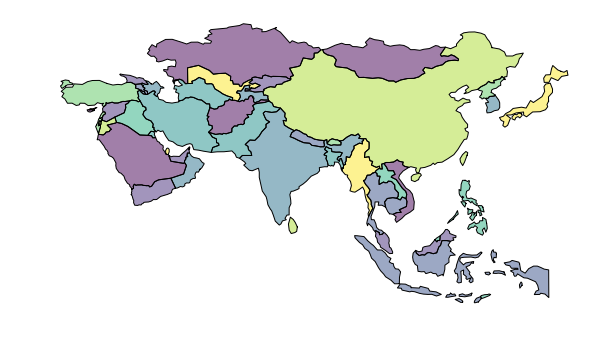

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
asia.plot(ax=ax)
plt.show()

In [21]:
stan_countries = [pais for pais in asia.name if 'stan' in pais[-4:]]

In [22]:
stan_countries

['Afghanistan',
 'Kazakhstan',
 'Kyrgyzstan',
 'Pakistan',
 'Tajikistan',
 'Turkmenistan',
 'Uzbekistan']

In [31]:
stan_countries_df = asia[asia['name'].isin(stan_countries)]

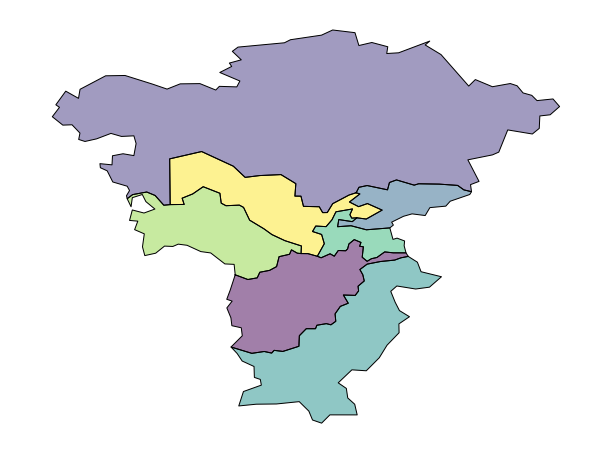

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
stan_countries_df.plot(ax=ax)
plt.show()

In [33]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [34]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

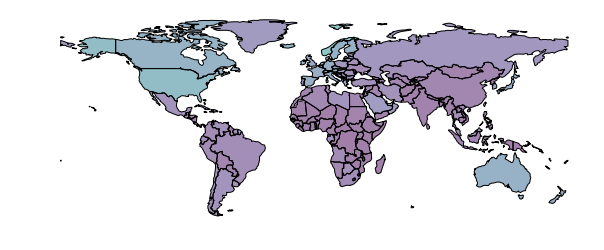

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world.plot(ax=ax, column='gdp_per_cap')
plt.show()

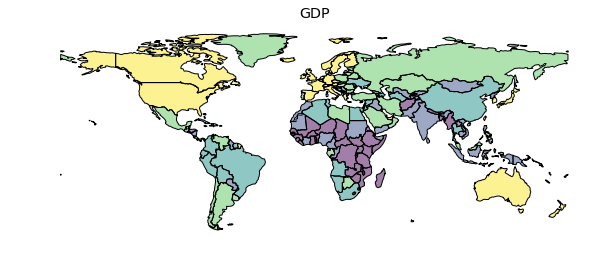

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world.plot(ax=ax, column='gdp_per_cap', scheme='quantiles')
plt.title('GDP')
plt.show()

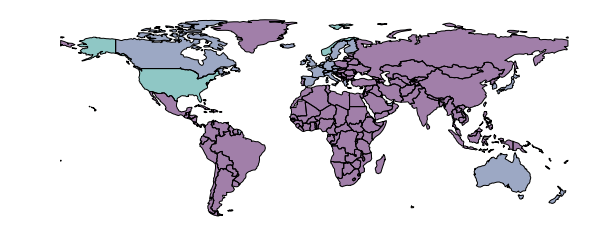

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world.plot(ax=ax, column='gdp_per_cap', scheme='equal_interval')
plt.show()

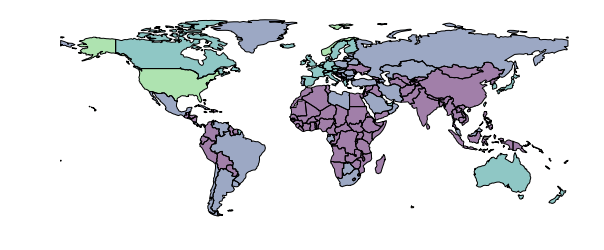

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world.plot(ax=ax, column='gdp_per_cap', scheme='fisher_jenks')
plt.show()

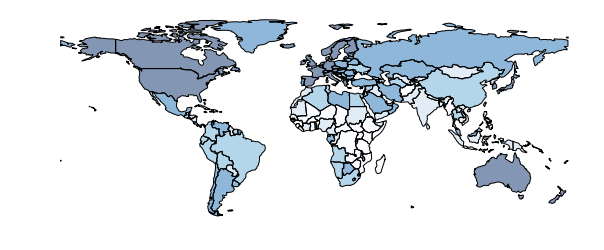

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_aspect('equal')
world.plot(ax=ax, column='gdp_per_cap', cmap='Blues', scheme='quantiles')
plt.savefig('mapa', dpi = 300, bbox_inches="tight", bbox_extra_artists=[])
plt.show()

# Para la próxima clase descargar QGIS en:
### http://www.qgis.org/en/site/forusers/download.html

<img src="https://upload.wikimedia.org/wikipedia/commons/7/71/QGis_Logo.png", width=200>